# Cardiovascular diseases

In [1]:
%%capture
!pip install numpy pandas matplotlib seaborn scikit-learn plotly psutil
!pip install --upgrade nbformat
!pip install tensorflow==2.12.0rc1
!pip install keras==2.12.0rc1

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('heart.csv', index_col=None, na_values=['nan'],)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(heart.shape)
print(heart.dtypes)

(918, 12)
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
# Check for null values
for col in heart.columns:
    print(col, heart[col].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


In [6]:
string_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
not_string_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
heart[string_col] = heart[string_col].astype('string')
heart[not_string_col] = heart[not_string_col].astype('float64')
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
# There is one record with RestingBP = 0, which is impossible. 
# We should change it to nan and then impute it later.
heart['RestingBP'] = heart['RestingBP'].replace(0, np.nan)

In [8]:
heart[heart['Cholesterol'] == 0].shape
# There are a lot of records with Cholesterol = 0, which is impossible too.
heart['Cholesterol'] = heart['Cholesterol'].replace(0, np.nan)

C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\295708638.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\

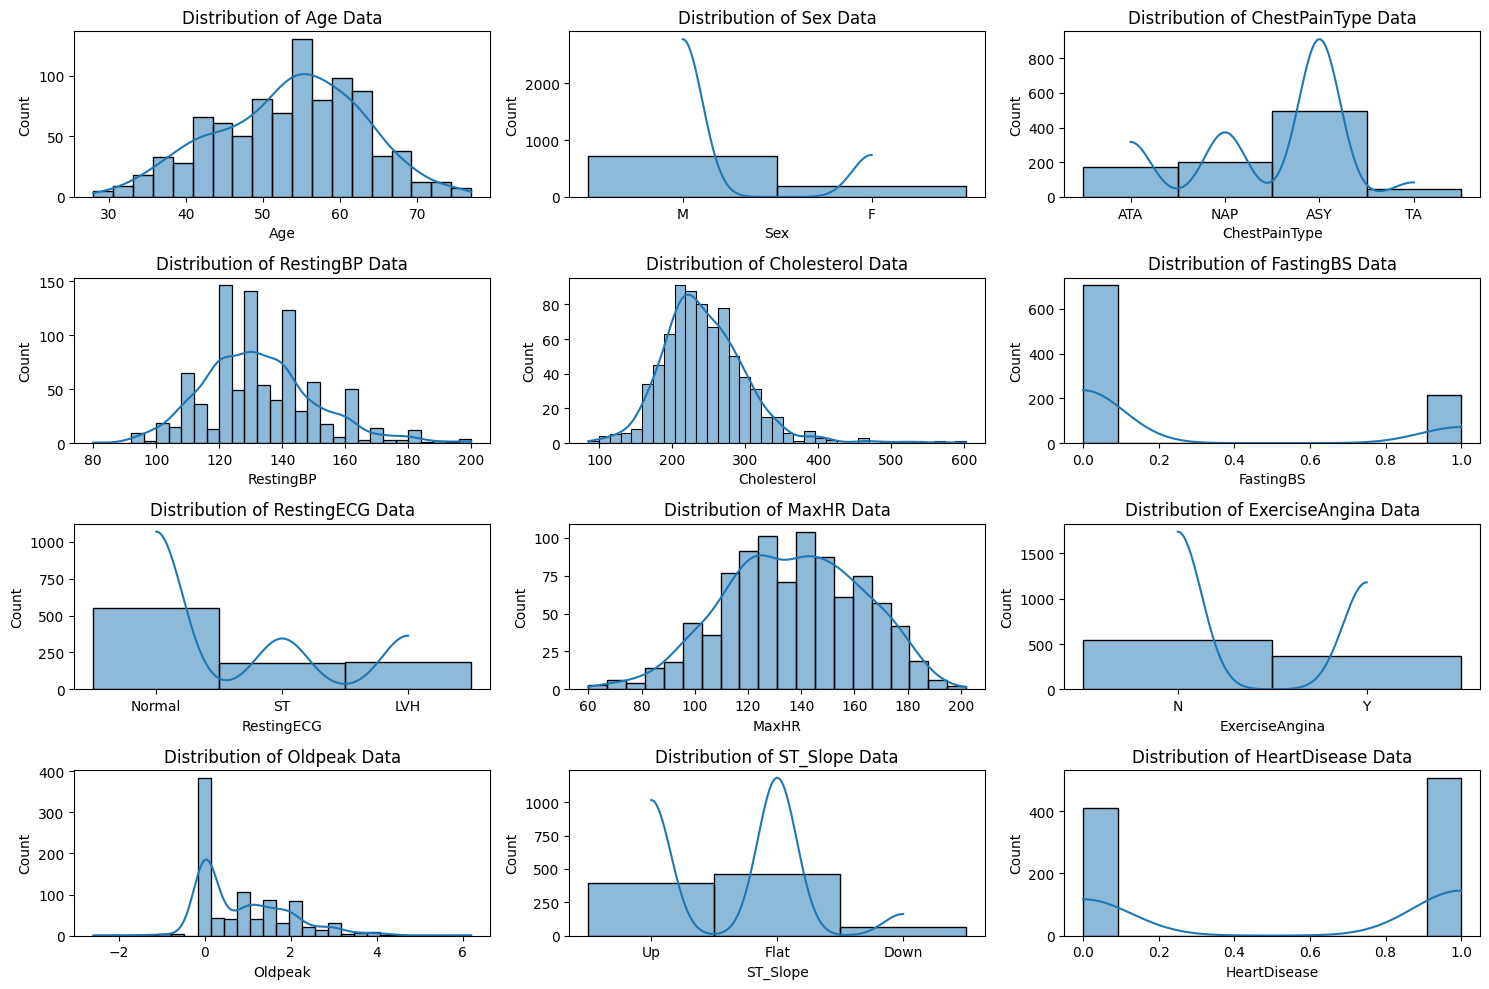

In [9]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True)
    plt.tight_layout()
    plt.plot()

C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\3463694800.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\3463694800.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\3463694800.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\3463694800.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\3463694800.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


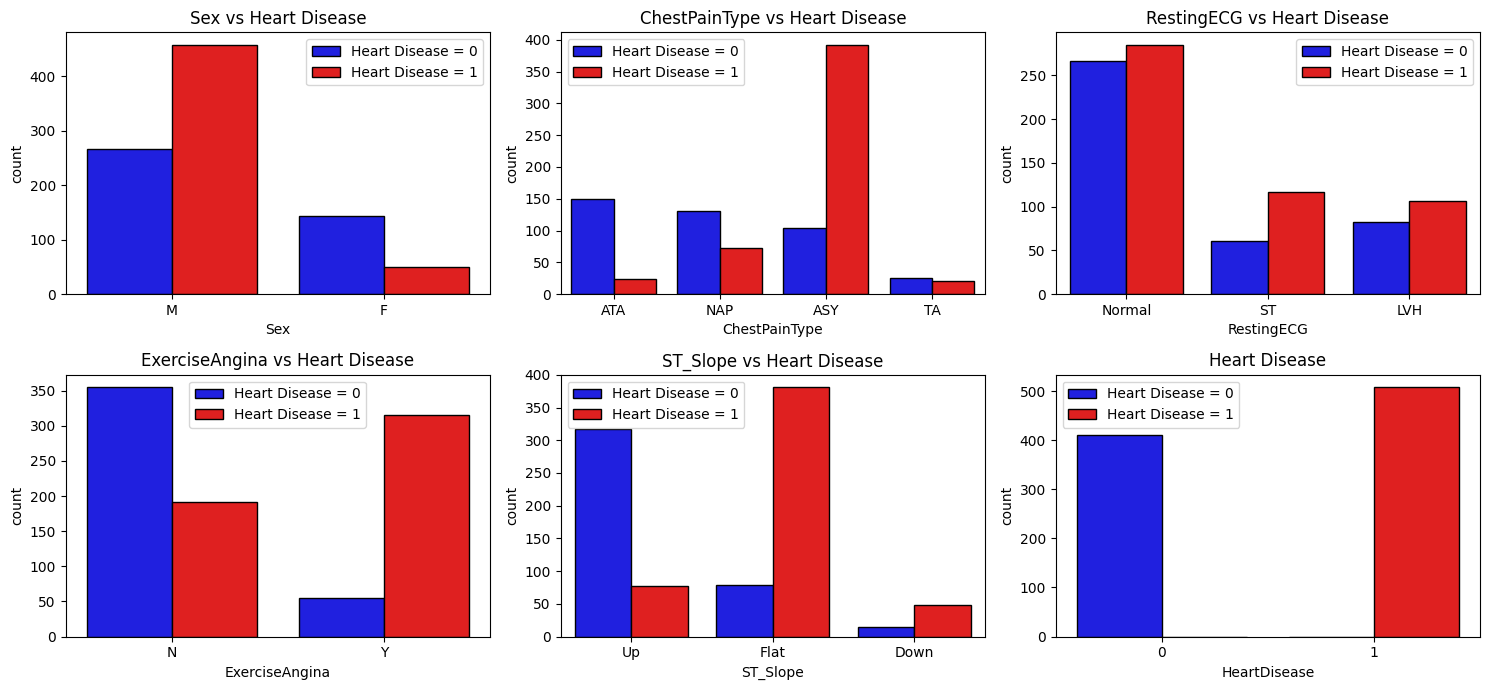

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

# For categorical variables
for i, col in enumerate(heart[string_col].columns):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{col} vs Heart Disease")
    sns.countplot(x=col, data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
    plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
    plt.tight_layout()

plt.subplot(2, 3, 6)
plt.title("Heart Disease")
sns.countplot(x='HeartDisease', data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
plt.tight_layout()

plt.show()

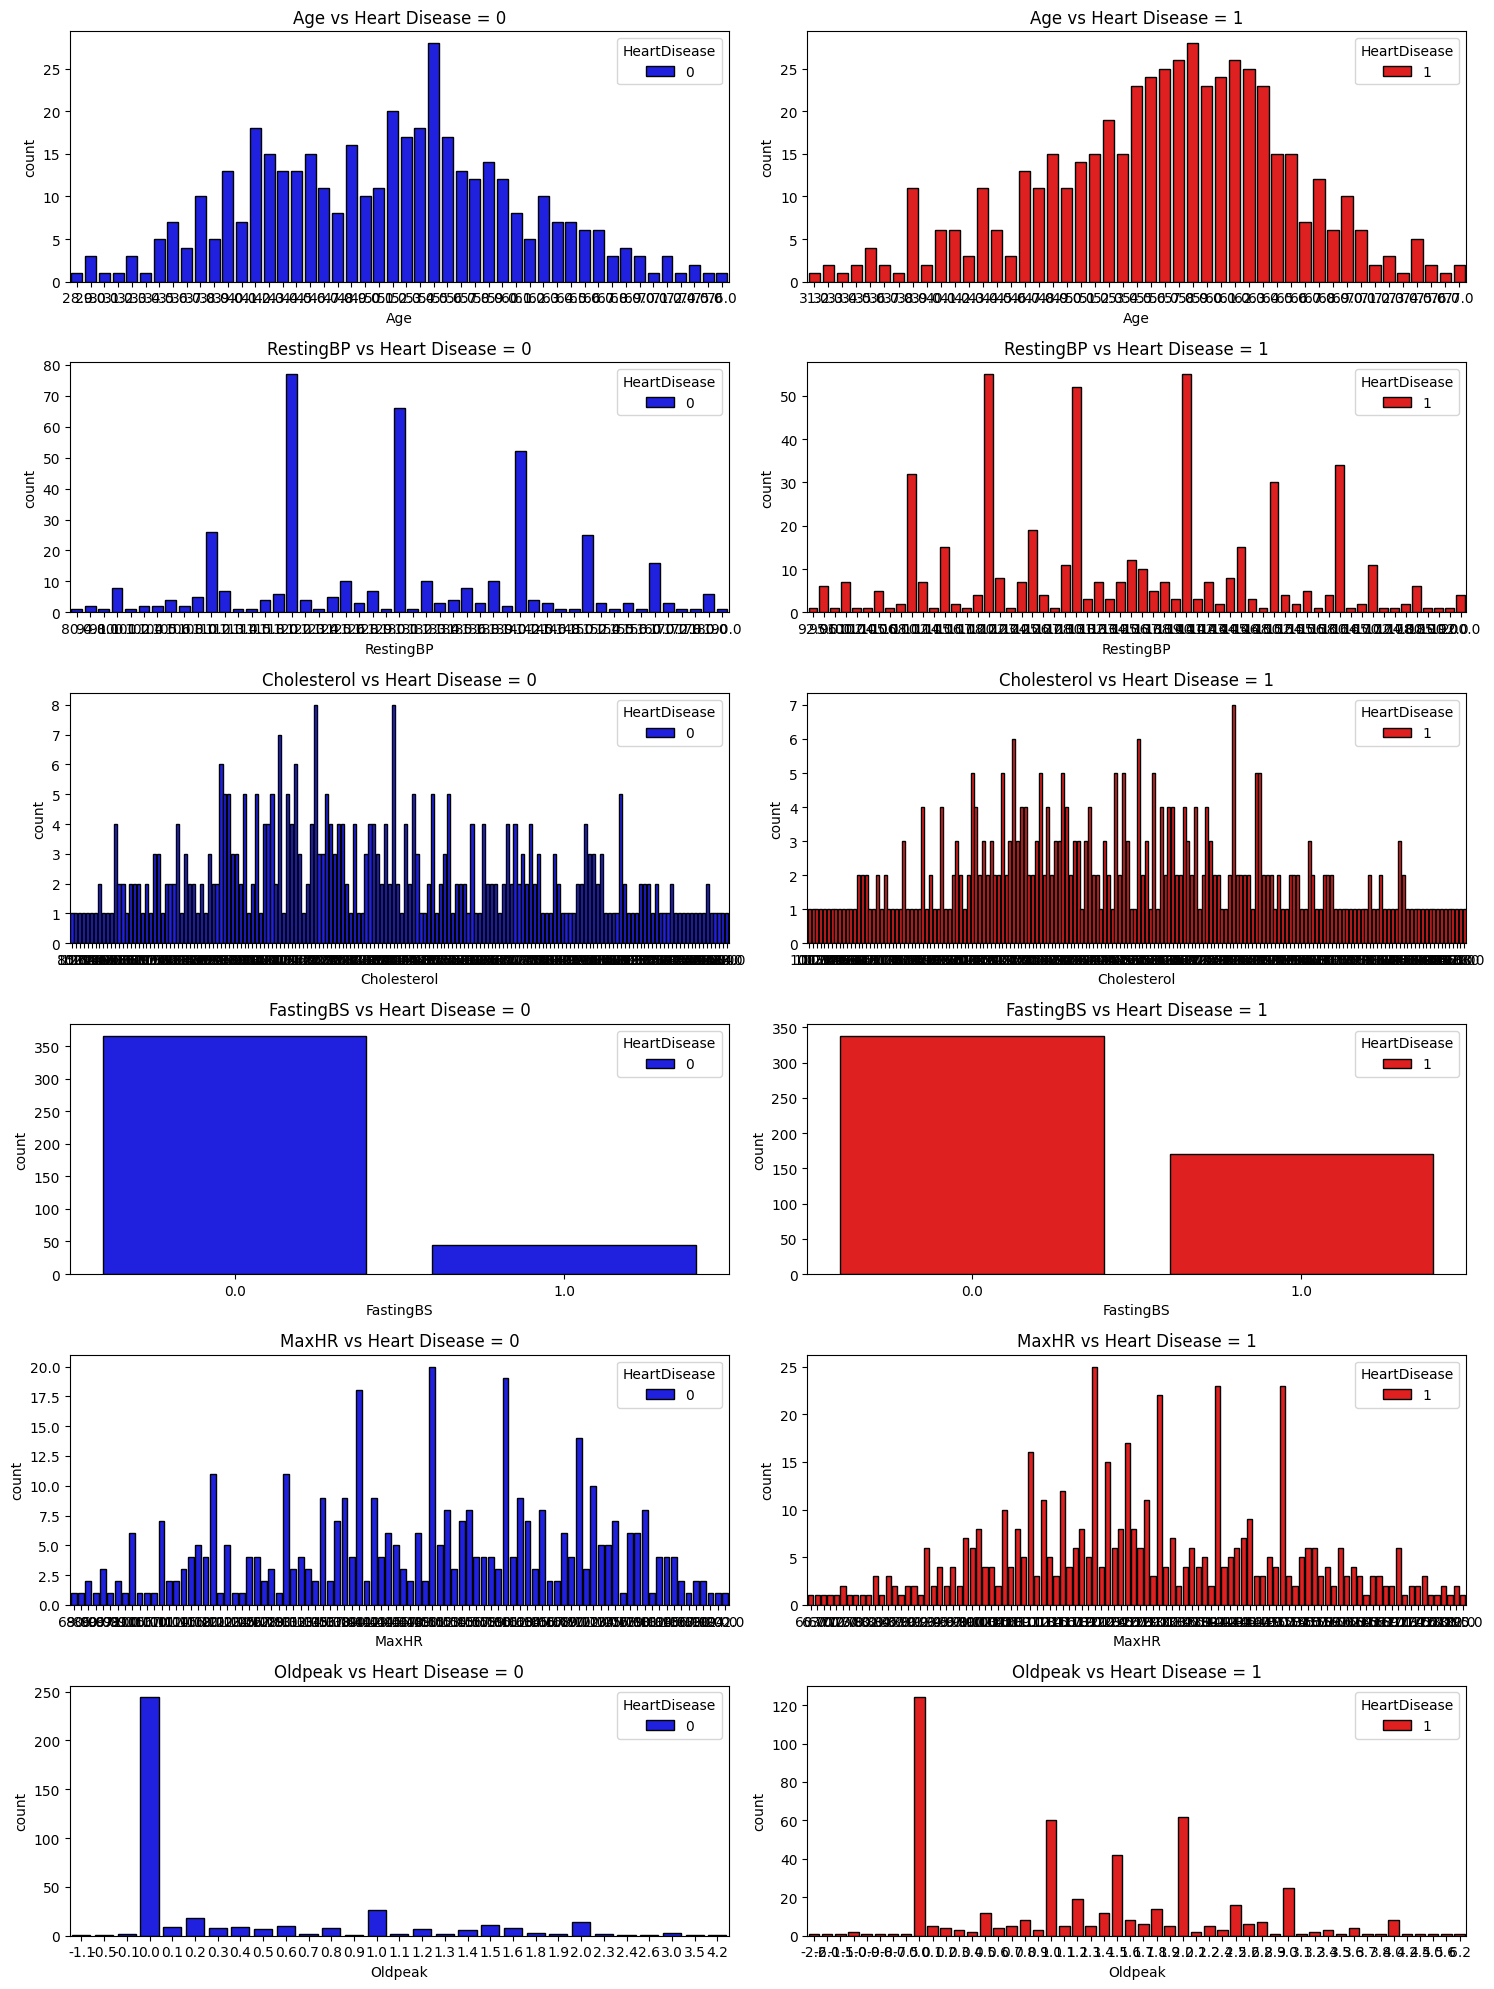

In [11]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# For numerical variables
numerical_cols = heart[not_string_col].columns
num_rows, num_cols = ax.shape

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i*2 + 1)
    plt.title(f"{col} vs Heart Disease = 0")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 0], hue="HeartDisease", palette=["blue"], edgecolor='black')
    
    plt.subplot(num_rows, num_cols, i*2 + 2)
    plt.title(f"{col} vs Heart Disease = 1")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 1], hue="HeartDisease", palette=["red"], edgecolor='black')

plt.tight_layout()
plt.show()


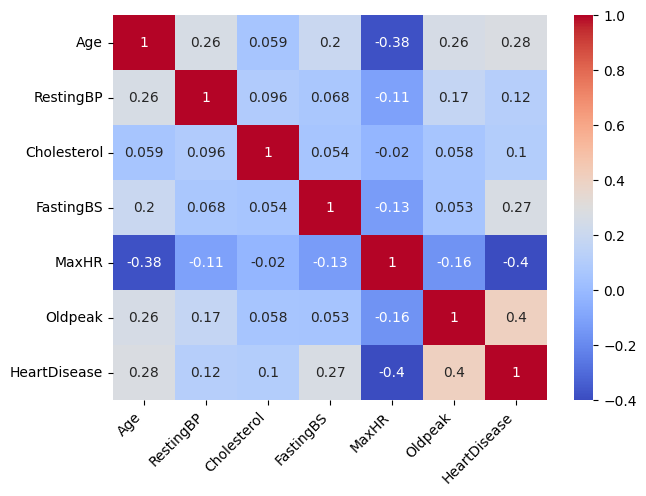

In [12]:
corr = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(heart[corr].corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [13]:
#unique values in each categorical column
for col in string_col:
    print(f"{col} has {heart[col].nunique()} unique values: {heart[col].unique()}")
    print("")

Sex has 2 unique values: <StringArray>
['M', 'F']
Length: 2, dtype: string

ChestPainType has 4 unique values: <StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string

RestingECG has 3 unique values: <StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string

ExerciseAngina has 2 unique values: <StringArray>
['N', 'Y']
Length: 2, dtype: string

ST_Slope has 3 unique values: <StringArray>
['Up', 'Flat', 'Down']
Length: 3, dtype: string



In [14]:
#Label Encoding for categorical columns with 2 unique values
le = preprocessing.LabelEncoder()
col_2v = ['Sex', 'ExerciseAngina']
for col in col_2v:
    heart[col] = le.fit_transform(heart[col])

In [15]:
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

We have 2 options for data scaling : 
- 1) Normalization 
- 2) Standardization 

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
- Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.
- Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.

In [16]:
# Scale the Oldpeak feature using MinMaxScaler
heart['Oldpeak'] = minmax_scaler.fit_transform(heart[['Oldpeak']])

# Scale the rest of the numerical features using StandardScaler
for col in not_string_col:
    if col != 'Oldpeak':
        heart[col] = standard_scaler.fit_transform(heart[[col]])

In [17]:
# One-hot encoding for categorical columns with more than 2 unique values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_name)], remainder='passthrough')
heart = np.array(ct.fit_transform(heart))

In [18]:
# kNN imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
heart = imputer.fit_transform(heart)

In [19]:
feature = heart[:, :-1]
target = heart[:, -1]

In [20]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=918*12)

Modeling

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import psutil
process = psutil.Process()
import time

Best k value: 5
Accuracy for best k value: 0.8956521739130435
RAM Consumption: 2.40625 MB
Time Taken: 0.7340476512908936 seconds
Classification Report for Best k value (5):
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        94
         1.0       0.89      0.93      0.91       136

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



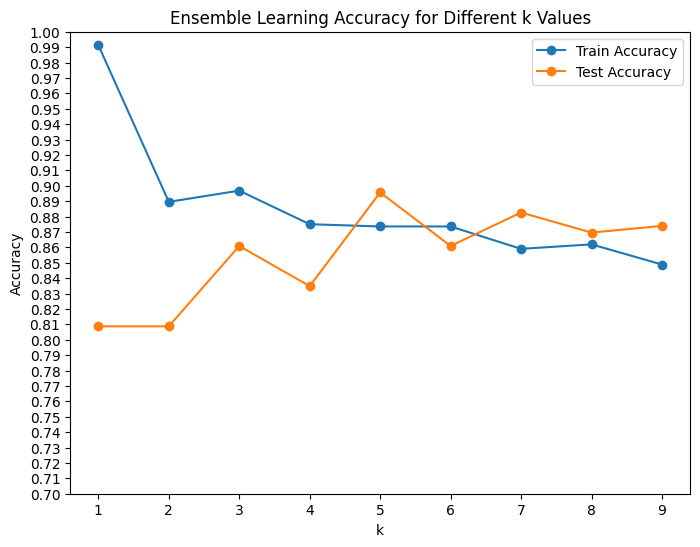

In [22]:
np.seed = 100
start = time.time()

# Get the initial memory usage
initial_memory = process.memory_info().rss

from sklearn.neighbors import KNeighborsClassifier

# Define the number of base classifiers in the ensemble
num_classifiers = 7

k_values = list(range(1, 10))
ensemble_train_accuracies = []
ensemble_test_accuracies = []

predictions = {}
classification_reports = {}

for k in k_values:
    # Create an empty list to store the base classifiers
    classifiers = []

    # Train the base classifiers on different subsets of the training data
    for i in range(num_classifiers):
        classifier = KNeighborsClassifier(n_neighbors=k)
        subset_indices = np.random.choice(len(feature_train), size=int(0.8 * len(feature_train)), replace=False)
        subset_features = feature_train[subset_indices]
        subset_targets = target_train[subset_indices]
        classifier.fit(subset_features, subset_targets)
        classifiers.append(classifier)

    # Make predictions using each base classifier and calculate their weights based on accuracy
    weights = []
    train_predictions = []
    test_predictions = []

    for classifier in classifiers:
        train_pred = classifier.predict(feature_train)
        test_pred = classifier.predict(feature_test)
        train_accuracy = accuracy_score(target_train, train_pred)
        test_accuracy = accuracy_score(target_test, test_pred)
        weight = train_accuracy / sum(train_accuracy for _ in classifiers)
        weights.append(weight)
        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    # Combine the predictions using weighted voting for training set
    ensemble_train_predictions = np.zeros_like(train_predictions[0], dtype=np.float64)

    for i in range(len(classifiers)):
        ensemble_train_predictions += weights[i] * train_predictions[i]

    ensemble_train_predictions = np.round(ensemble_train_predictions)

    # Combine the predictions using weighted voting for test set
    ensemble_test_predictions = np.zeros_like(test_predictions[0], dtype=np.float64)

    for i in range(len(classifiers)):
        ensemble_test_predictions += weights[i] * test_predictions[i]

    ensemble_test_predictions = np.round(ensemble_test_predictions)

    # Store the predictions in a dictionary
    predictions[k] = ensemble_test_predictions
    
    # Evaluate the ensemble's accuracy for training and test sets
    ensemble_train_accuracy = accuracy_score(target_train, ensemble_train_predictions)
    ensemble_test_accuracy = accuracy_score(target_test, ensemble_test_predictions)
    ensemble_train_accuracies.append(ensemble_train_accuracy)
    ensemble_test_accuracies.append(ensemble_test_accuracy)

    # Store the classification report for the current k value
    report = classification_report(target_test, ensemble_test_predictions)
    classification_reports[k] = report

# Best k value for the ensemble model based on test accuracy
best_k = k_values[ensemble_test_accuracies.index(max(ensemble_test_accuracies))]
print(f'Best k value: {best_k}')
print(f'Accuracy for best k value: {max(ensemble_test_accuracies)}')

end = time.time()

# Get the updated memory usage
updated_memory = process.memory_info().rss

# Calculate RAM consumption in bytes
ram_consumption = updated_memory - initial_memory

# Convert RAM consumption to a more readable format
ram_consumption_mb = ram_consumption / 1024 / 1024

print(f"RAM Consumption: {ram_consumption_mb} MB")
print(f"Time Taken: {end - start} seconds")

# Print the classification report for the best k value
best_k_report = classification_reports[best_k]
print(f'Classification Report for Best k value ({best_k}):')
print(best_k_report)

# Plot the ensemble accuracies for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, ensemble_train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, ensemble_test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Ensemble Learning Accuracy for Different k Values')
plt.legend()
plt.xticks(k_values)
plt.yticks(np.arange(0.7, 1.01, 0.01))  # Set y-axis ticks from 0.7 to 1 with a step of 0.01
plt.ylim(0.7, 1)
plt.show()

ensemble_knn_pred = predictions[best_k]
fpr_knn, tpr_knn, _ = roc_curve(target_test, predictions[best_k])
auc_knn = round(roc_auc_score(target_test, predictions[best_k]), 3)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
RAM Consumption: 0.8359375 MB
Time Taken: 8.409711360931396 seconds


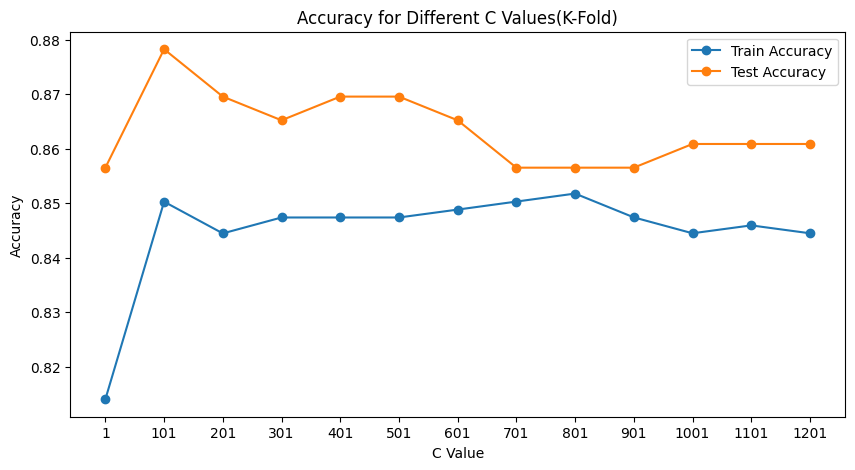

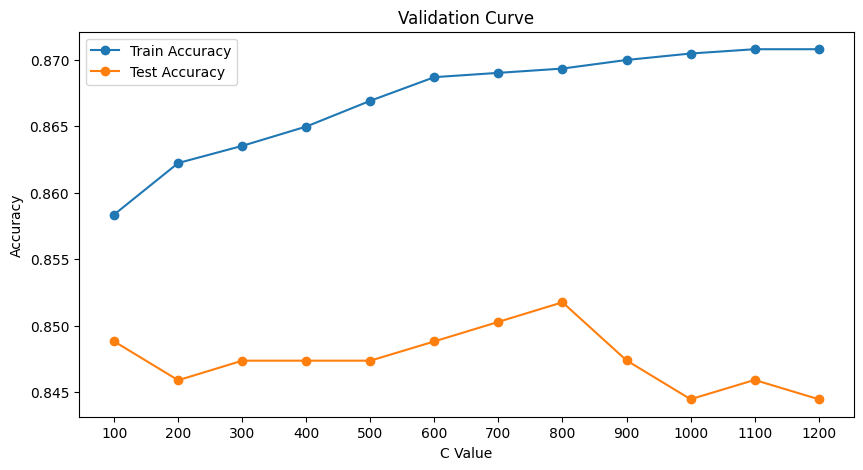

Confusion Matrix:
 [[ 80  14]
 [ 14 122]]
Train Accuracy: 85.76%
Test Accuracy: 87.83%
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        94
         1.0       0.90      0.90      0.90       136

    accuracy                           0.88       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230



In [23]:
start = time.time()
# Get the initial memory usage
initial_memory = process.memory_info().rss

#grid search for best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
svm = SVC()
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(feature_train, target_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Parameters:', best_parameters)

end = time.time()

# Get the updated memory usage
updated_memory = process.memory_info().rss

# Calculate RAM consumption in bytes
ram_consumption = updated_memory - initial_memory

# Convert RAM consumption to a more readable format
ram_consumption_mb = ram_consumption / 1024 / 1024

print(f"RAM Consumption: {ram_consumption_mb} MB")
print(f"Time Taken: {end - start} seconds")

#k-fold for different C values
c_range = range(1, 1300, 100)
train_accuracy = []
test_accuracy = []
for c in c_range:
    svm = SVC(C=c,kernel='rbf',gamma=0.001)
    kfold = KFold(n_splits=10, random_state=918*12, shuffle=True)
    cv_results = cross_val_score(svm, feature_train, target_train, cv=kfold, scoring='accuracy')
    train_accuracy.append(cv_results.mean())
    svm.fit(feature_train, target_train)
    test_accuracy.append(accuracy_score(target_test, svm.predict(feature_test)))
plt.figure(figsize=(10, 5))
plt.plot(c_range, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(c_range, test_accuracy, marker='o', label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values(K-Fold)')
plt.legend()
plt.show()

#plotting the validation curve
from sklearn.model_selection import validation_curve
c_range = range(100, 1300, 100)
train_scores, test_scores = validation_curve(svm, feature_train, target_train, param_name='C', param_range=c_range, cv=kfold, scoring='accuracy', n_jobs=-1)
plt.figure(figsize=(10, 5))
plt.plot(c_range, train_scores.mean(axis=1), marker='o', label='Train Accuracy')
plt.plot(c_range, test_scores.mean(axis=1), marker='o', label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.show()

#svm with best parameters
svm = SVC(C=100,kernel='rbf',gamma=0.001)
svm.fit(feature_train, target_train)
target_pred = svm.predict(feature_test)

cm = confusion_matrix(target_test, target_pred)
print('Confusion Matrix:\n', cm)

#print the accuracy score of train and test data
print('Train Accuracy: {:.2f}%'.format(accuracy_score(target_train, svm.predict(feature_train))*100))
print('Test Accuracy: {:.2f}%'.format(accuracy_score(target_test, target_pred)*100))

#precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

#roc curve
fpr_svm, tpr_svm, _ = roc_curve(target_test, target_pred)
auc_svm = round(roc_auc_score(target_test, target_pred), 3)


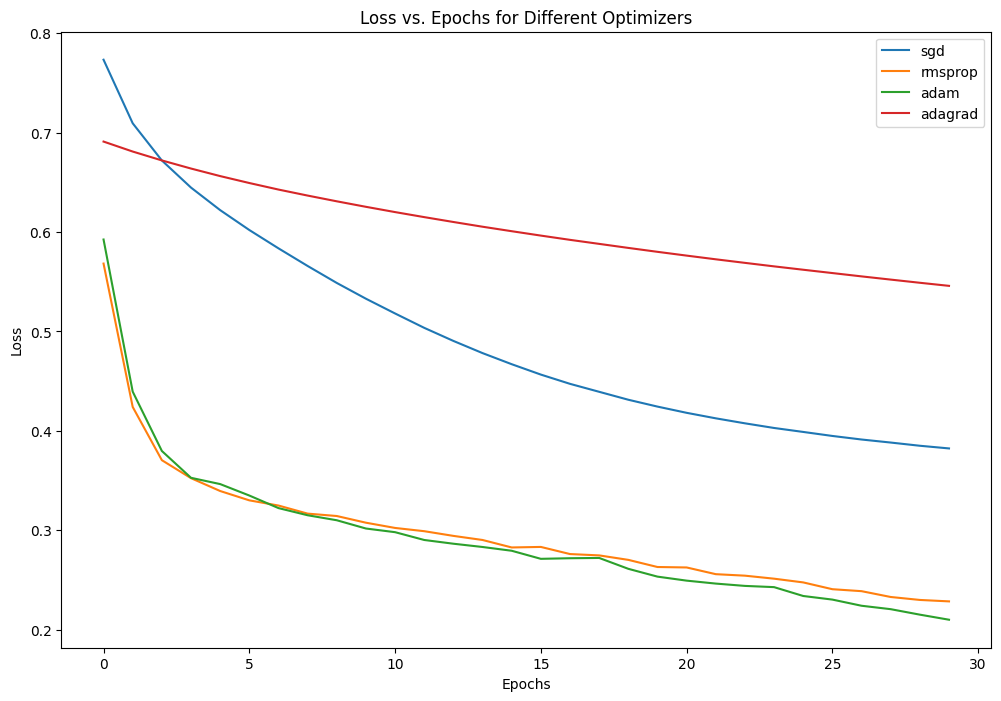

In [24]:
#impot library for ANN model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers
#find best optimizer
D =['sgd','rmsprop','adam','adagrad']
history = {}
for d in D:
    ANN_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=[feature_train.shape[1]]),
    layers.Dense(80, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
    ANN_model.compile(loss='binary_crossentropy', optimizer= d, metrics=['accuracy'])
    training_history = ANN_model.fit(feature_train, target_train, epochs=30, verbose=False) 
    history[d] = training_history.history

# Plot the loss vs. epochs for each optimizer
plt.figure(figsize=(12, 8))
for d in D:
    plt.plot(history[d]['loss'], label=d)
plt.title('Loss vs. Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

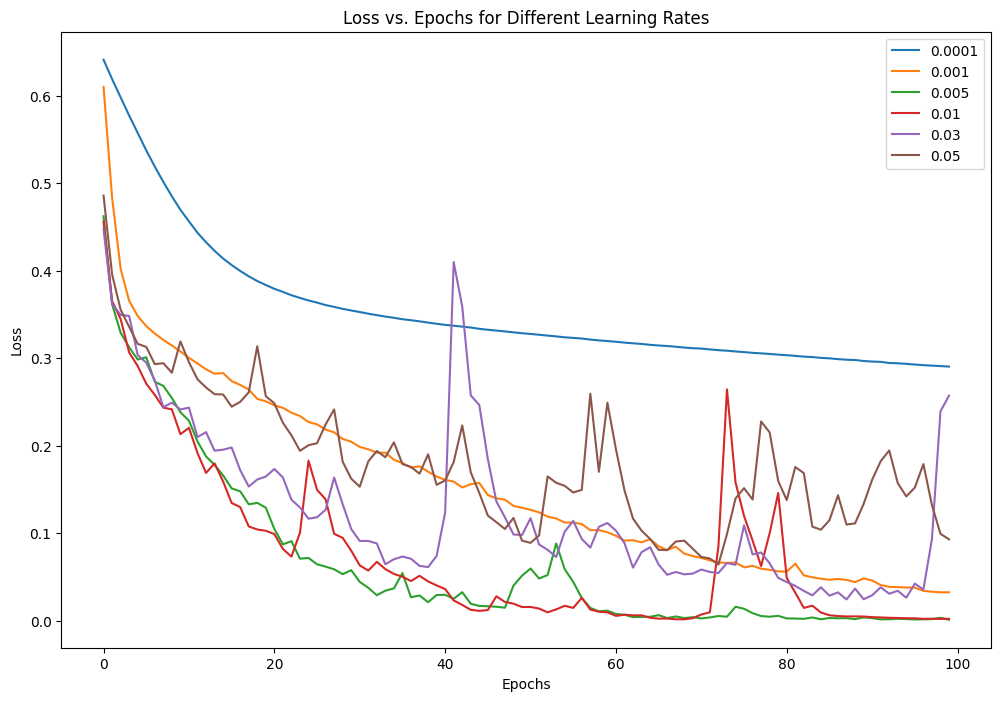

In [25]:
#find where the best learning rate is
lr = [0.0001,0.001,0.005,0.01,0.03,0.05]
for i in lr:
    ANN_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=[feature_train.shape[1]]),
    layers.Dense(80, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
    ANN_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=i), metrics=['accuracy'])
    training_history = ANN_model.fit(feature_train, target_train, epochs=100, verbose=False) 
    history[i] = training_history.history
# Plot the loss vs. epochs for each learning rate
plt.figure(figsize=(12, 8))
for i in lr:
    plt.plot(history[i]['loss'], label=i)
plt.title('Loss vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


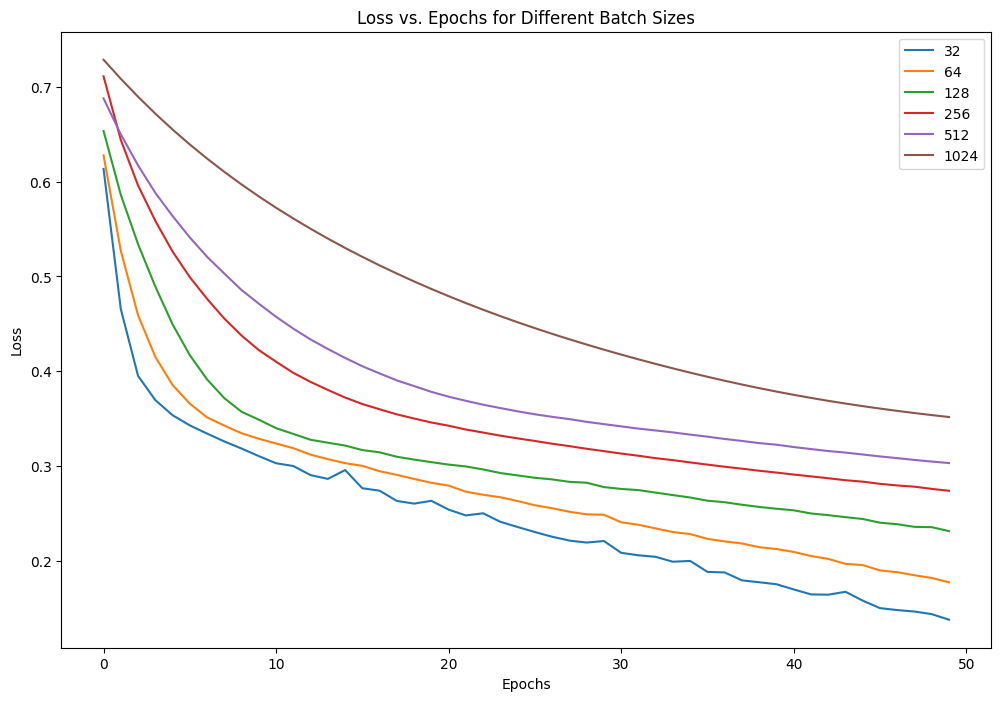

In [26]:
#find where is best batch size
batch_size = [32, 64, 128, 256, 512, 1024]
for i in batch_size:
    ANN_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=[feature_train.shape[1]]),
    layers.Dense(80, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
    ANN_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    training_history = ANN_model.fit(feature_train, target_train, epochs=50, verbose=False, batch_size=i) 
    history[i] = training_history.history
# Plot the loss vs. epochs for each batch size
plt.figure(figsize=(12, 8))
for i in batch_size:
    plt.plot(history[i]['loss'], label=i)
plt.title('Loss vs. Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

def create_model(neurons, learning_rate):
    # create model
    model = Sequential()
    model.add(layers.InputLayer(input_shape=[feature_train.shape[1]]))
    model.add(layers.Dense(neurons[0], activation='relu'))
    model.add(layers.Dense(neurons[1], activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=False, epochs=100, batch_size=32)

# define the grid search parameters
neurons = [[15, 15], [30, 35], [80, 80]]
learning_rate = [0.001, 0.002, 0.003, 0.005]
param_grid = dict(neurons=neurons, learning_rate=learning_rate)

# grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(feature_train, target_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\dnb02\AppData\Local\Temp\ipykernel_3660\1643196679.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=False, epochs=100, batch_size=32)


Best: 0.835724 using {'learning_rate': 0.001, 'neurons': [15, 15]}


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
best_neural = grid_result.best_params_['neurons']
best_learning_rate = grid_result.best_params_['learning_rate']
ANN_model = tf.keras.Sequential([
layers.InputLayer(input_shape=[feature_train.shape[1]]),
layers.Dense(best_neural[0], activation='relu'),
layers.Dense(best_neural[1], activation='relu'),
layers.Dense(1, activation='sigmoid')
])
ANN_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=best_learning_rate), metrics=['accuracy'])
training_history = ANN_model.fit(feature_train, target_train, epochs=100, verbose=False, batch_size=32) 
history = training_history.history
#train accuracy
print("Train Accuracy: %.2f%%" % (ANN_model.evaluate(feature_train, target_train,verbose =False)[1]*100))
#test accuracy
print("Test Accuracy: %.2f%%" % (ANN_model.evaluate(feature_test, target_test,verbose=False)[1]*100))
#nparray predict
test_pred = ANN_model.predict(feature_test)
test_pred = np.round(test_pred).astype(int)
#classification report
print(classification_report(target_test, test_pred))
#confusion matrix
cm = confusion_matrix(target_test, test_pred)
print(cm)
fpr_ann, tpr_ann, _ = roc_curve(target_test, test_pred)
auc_ann = round(roc_auc_score(target_test, target_pred), 3)


Train Accuracy: 90.26%
Test Accuracy: 88.26%
8/8 [==============================] - 0s 636us/step
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85        94
         1.0       0.89      0.92      0.90       136

    accuracy                           0.88       230
   macro avg       0.88      0.87      0.88       230
weighted avg       0.88      0.88      0.88       230

[[ 78  16]
 [ 11 125]]


c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


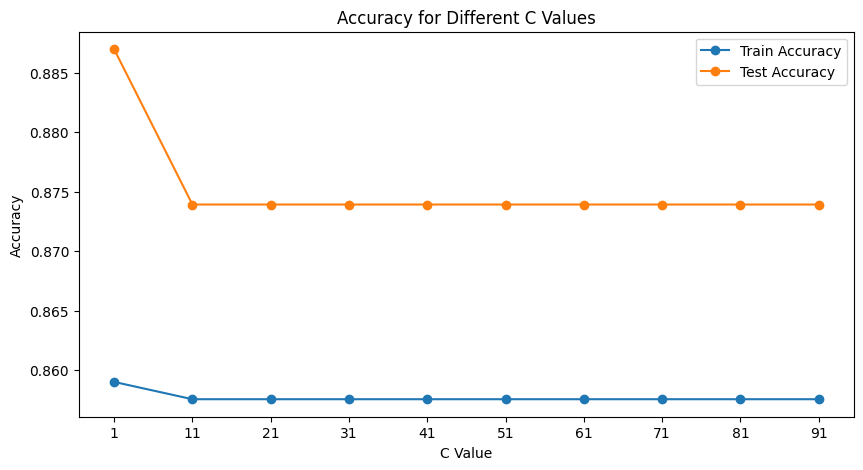

Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy: 87.39%
RAM Consumption: 2.55859375 MB
Time Taken: 2.9615564346313477 seconds
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        94
         1.0       0.90      0.89      0.89       136

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [29]:
start = time.time()
# Get the initial memory usage
initial_memory = process.memory_info().rss

from sklearn.linear_model import LogisticRegression

c_range = range(1, 101, 10)
train_accuracy = []
test_accuracy = []

for c in c_range:
    lr = LogisticRegression(C=c, penalty='l1', solver='saga', max_iter=1000)
    lr.fit(feature_train, target_train)
    train_pred = lr.predict(feature_train)
    train_accuracy.append(accuracy_score(target_train, train_pred))
    test_pred = lr.predict(feature_test)
    test_accuracy.append(accuracy_score(target_test, test_pred))

#Plot the results
plt.figure(figsize=(10, 5))
plt.plot(c_range, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(c_range, test_accuracy, marker='o', label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values')
plt.legend()
plt.show()

lr = LogisticRegression()
parameters = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'max_iter': [1000]},
    {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': [1000]}
]

grid_search = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(feature_train, target_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Parameters:', best_parameters)

lr = LogisticRegression(**best_parameters)
lr.fit(feature_train, target_train)
test_pred = lr.predict(feature_test)
test_accuracy = accuracy_score(target_test, test_pred)
print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))

end = time.time()

# Get the updated memory usage
updated_memory = process.memory_info().rss

# Calculate RAM consumption in bytes
ram_consumption = updated_memory - initial_memory

# Convert RAM consumption to a more readable format
ram_consumption_mb = ram_consumption / 1024 / 1024

print(f"RAM Consumption: {ram_consumption_mb} MB")
print(f"Time Taken: {end - start} seconds")

#classification report  
print(classification_report(target_test, test_pred))

#roc curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(target_test, test_pred)
auc_lr = round(roc_auc_score(target_test, target_pred), 3)


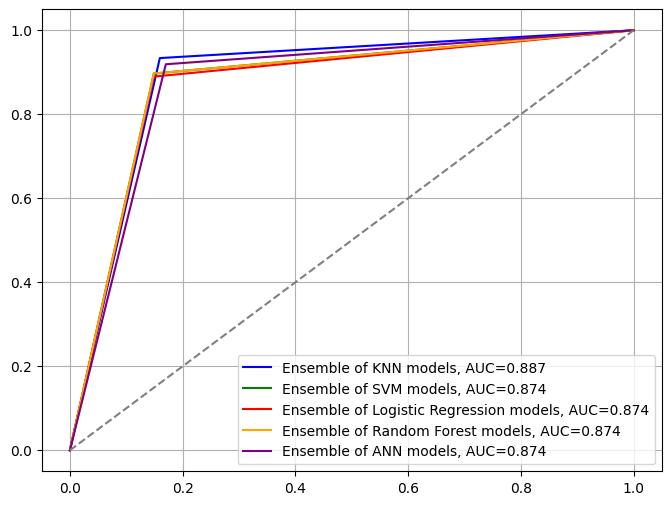

In [30]:
# Copied from heart_predict_tree.ipynb
fpr_rf = [0, 0.14893617, 1]
tpr_rf = [0, 0.8970588235, 1]
auc_rf = 0.874


plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr_knn, tpr_knn, label="Ensemble of KNN models, AUC=" + str(auc_knn), color='blue')
plt.plot(fpr_svm, tpr_svm, label="Ensemble of SVM models, AUC=" + str(auc_svm), color='green')
plt.plot(fpr_lr, tpr_lr, label="Ensemble of Logistic Regression models, AUC=" + str(auc_lr), color='red')
plt.plot(fpr_rf, tpr_rf, label="Ensemble of Random Forest models, AUC=" + str(auc_rf), color='orange')
plt.plot(fpr_ann, tpr_ann, label="Ensemble of ANN models, AUC=" + str(auc_ann), color='purple')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add diagonal line
plt.legend()
plt.grid(True)
plt.show()